In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]
iso_encoding = 'ISO-8859-1'

In [3]:
with open('../iso_country_codes/iso_country_codes.json', encoding=iso_encoding) as fp:
    iso_country_dic = dict( json.load(fp))

In [4]:
def sheet(name, clean=False):
    if (isinstance(name, str)):
        clean_prefix = 'clean-' if clean else ''
        return f'{clean_prefix}school-completion-rates-nov-2019-{name}.csv'
    return None

In [5]:
def clean_after_clear_row(df, column_name):
    _df = df.copy()
    _first_invald_row, *_ = _df[_df[column_name].isnull()].index.tolist()
    _df = _df[:_first_invald_row]

    return _df

In [6]:
def read_sheet(sheet_name):
    df = pd.read_csv(sheet(sheet_name), encoding=iso_encoding)
    df.columns = df.iloc[1]
    string_columns = list(filter(lambda x: isinstance(x, str),  df.columns.tolist()))
    df = df[string_columns]
    df = df.iloc[2:]
    df.columns = map(str.strip, df.columns)
    df.columns = map(str.lower, df.columns)
    df = df.reset_index(drop=True)

    return df

In [7]:
def get_clean_df(name):
    _df = read_sheet(name)
    return clean_after_clear_row(_df, 'country')


In [8]:
_missing_countries_dir = {
    'Bolivia (Plurinational State of)': iso_country_dic['bolivia'],
    'Cabo Verde': iso_country_dic['cape verde'],
    # 'Côte d\'Ivoire': iso_country_dic["côte d'ivoire"],
    'Côte d\'Ivoire': 'CIV',
    'CÃ´te d\'Ivoire': 'CIV',
    'Czechia': iso_country_dic['czech republic'],
    "Democratic People's Republic of Korea": iso_country_dic['north korea'],
    'Democratic Republic of the Congo': iso_country_dic['congo'],
    'Iran (Islamic Republic of)': iso_country_dic['iran'],
    'Kyrgyzstan': iso_country_dic['kirghizistan'],
    "Lao People's Democratic Republic": iso_country_dic['laos'],
    'Micronesia (Federated States of)': iso_country_dic['micronesia, federated states of'],
    'Palau': iso_country_dic['pacific islands (palau)'],
    'Republic of Korea': iso_country_dic['korea'],
    'Republic of Moldova': iso_country_dic['moldova'],
    'Russian Federation': iso_country_dic['russia'],
    'Slovakia': iso_country_dic['slovak republic'],
    'State of Palestine': iso_country_dic['occupied palestinian territory'],
    'Eswatini': iso_country_dic['swaziland'],
    'Syrian Arab Republic': iso_country_dic['syria'],
    'Tajikistan': iso_country_dic['tadjikistan'],
    # 'Turkmenistan': iso_country_dic['turkmenistan'],
    'Venezuela (Bolivarian Republic of)' : iso_country_dic['venezuela'],
}

missing_countries_dir = { k.lower(): v for k, v in _missing_countries_dir.items() }
complete_countries_dir = missing_countries_dir | iso_country_dic


In [9]:
key_variables = [
    'country',
    'total',
    'male',
    'female',
    'urban',
    'rural',
    'poorest',
    'second',
    'middle',
    'fourth',
    'richest',
    'source',
    'total population, one year before primary',
    'ID',
 ]

In [10]:
def clean_df(name):
    _df = get_clean_df(name)    
    _df['ID'] = _df['country'].str.lower().str.strip().map(complete_countries_dir)
    return _df[key_variables]

In [11]:
def save_dataframe(df, sheet_name):
    df.to_csv(sheet(sheet_name, clean=True), encoding=iso_encoding, index=False)

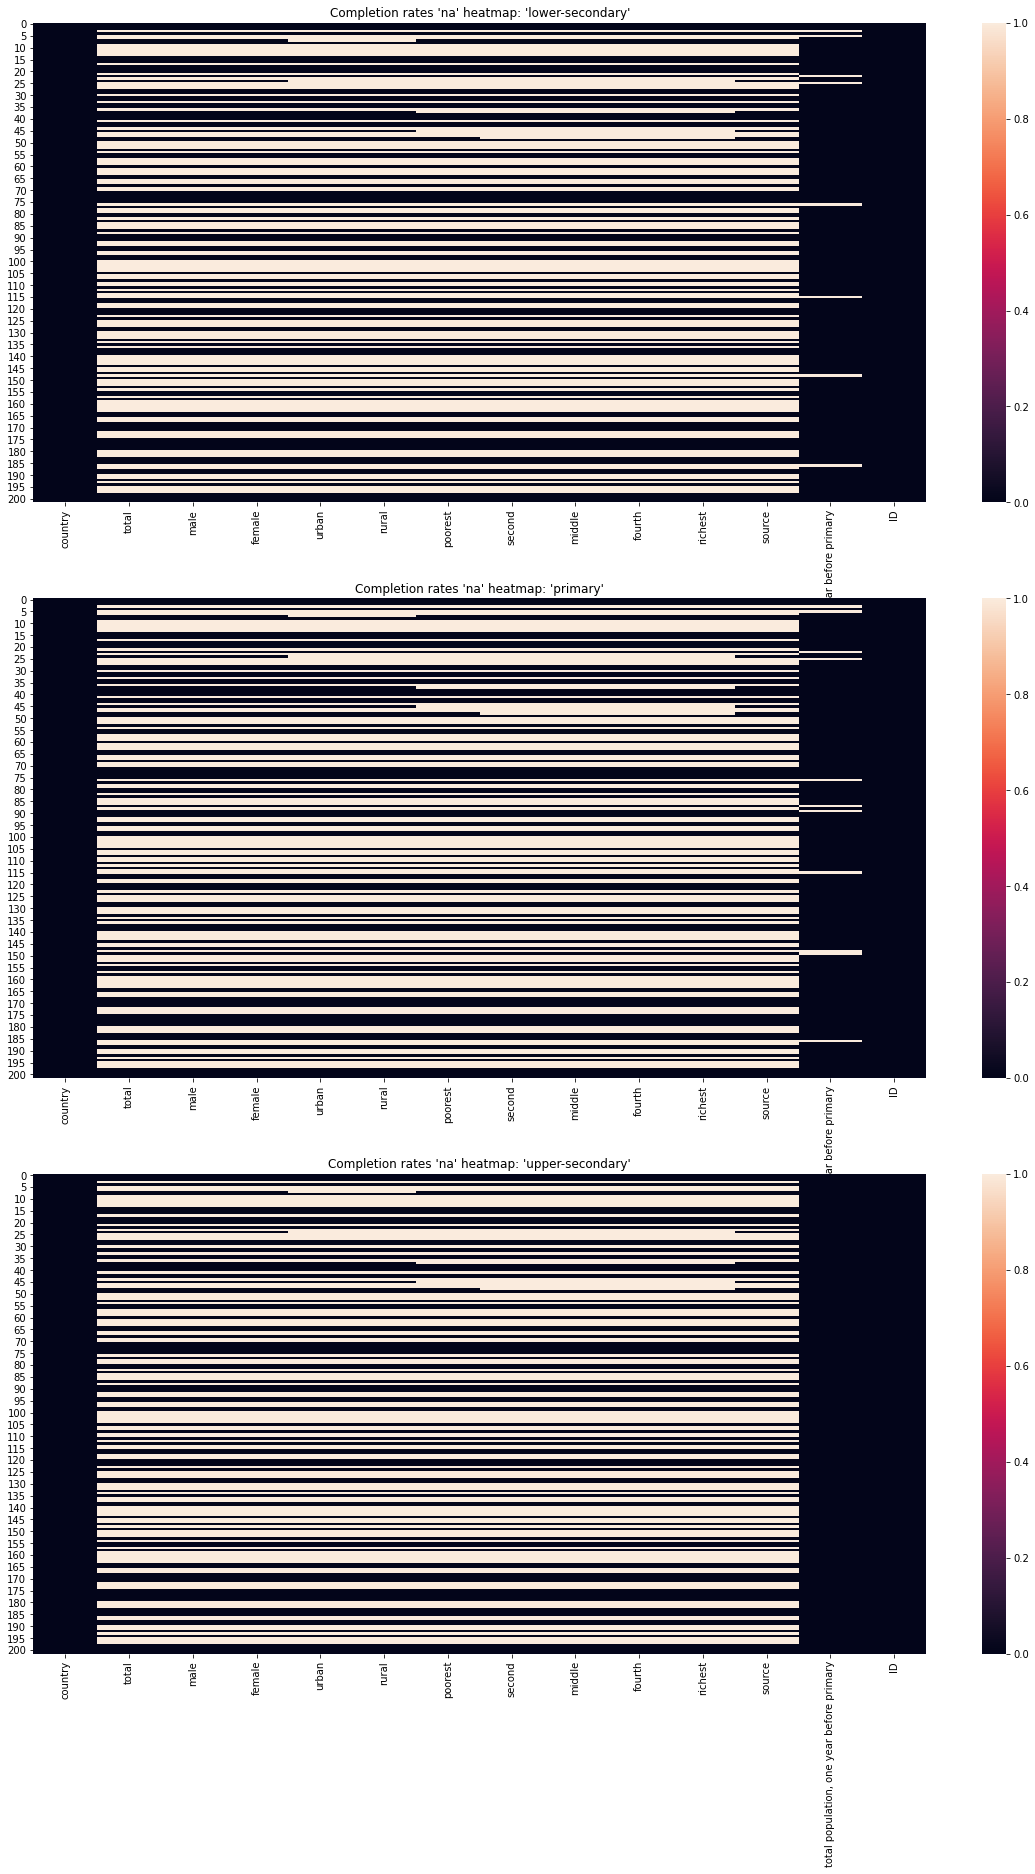

In [12]:
data_sheet_list = ['lower-secondary', 'primary', 'upper-secondary']

fig, axes = plt.subplots(
    nrows=len(data_sheet_list), 
    figsize=(20, len(data_sheet_list) * 10)
)

for index, name in enumerate(data_sheet_list):
    _clean_df = clean_df(name)
    sns.heatmap(_clean_df.isna(), ax=axes[index])
    axes[index].set_title('Completion rates \'na\' heatmap: \'{}\''.format(name))
    save_dataframe(_clean_df, name)
